In [116]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle
import os
import copy
import networkx as nx

SOLUTION_DIR = './solutions/'
NODE_SIZE = 500
WALKED_NODE_SIZE = 500
WALKED_NODE_COLOR = 'orange'
EDGE_NODE_COLOR = 'green'
CORE_NODE_COLOR = 'gray'
FIG_SIZE = (14, 7)
TALKER_COLOR = 'b'
LISTENER_COLOR = 'b'

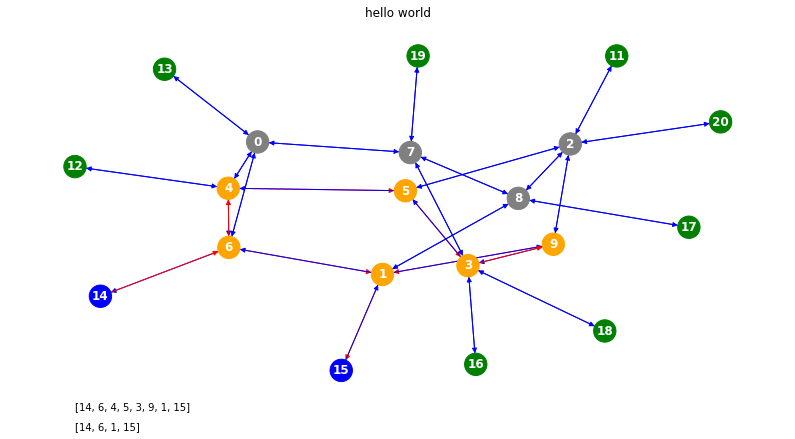

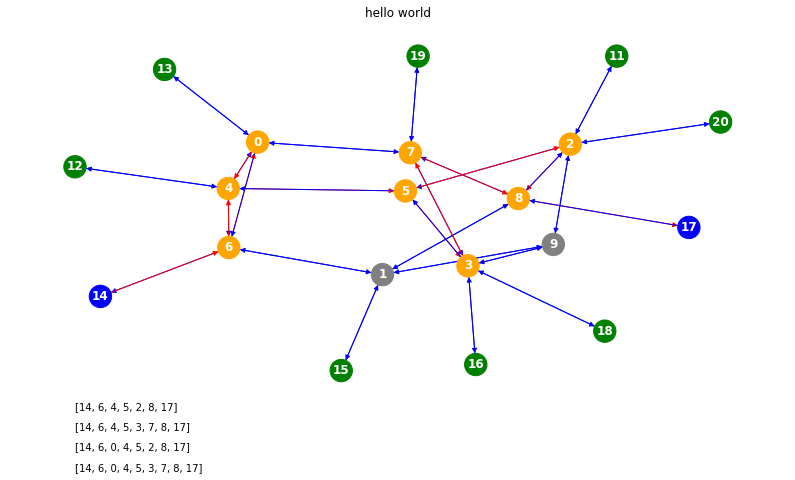

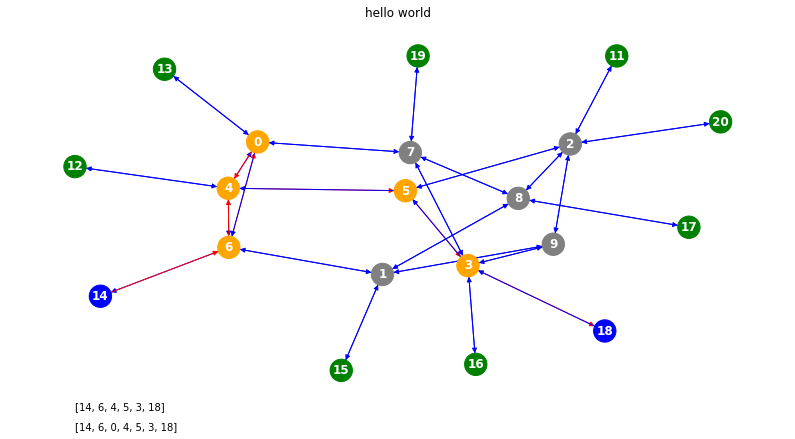

In [117]:
def v_flow_routes_per_talker_listener_pair(filename):
    with open(filename, 'rb') as file:
        # get solution
        solution = pickle.load(file)
        # get edge nodes and core nodes, then set color and node size for node
        node_id_list = list(solution.graph.nx_graph.nodes)
        edge_nodes_id_list = []
        core_node_id_list = []
        node_colors = []
        node_sizes = []
        for node_id in node_id_list:
            node_sizes.append(NODE_SIZE)
            if solution.graph.nx_graph.degree(node_id) == 2:  # edge node
                edge_nodes_id_list.append(node_id)
                node_colors.append(EDGE_NODE_COLOR)
            else:  # core node
                core_node_id_list.append(node_id)
                node_colors.append(CORE_NODE_COLOR)
        # disposal each flow
        pos = nx.kamada_kawai_layout(solution.graph.nx_graph)  # graph layout
        i = 1
        for flow in solution.flows:
            if i > 1:
                break
            i += 1
            for e2e_routes in  flow.routes:  # flow.routes: List[List[List[EdgeId]]]
                # prepare figure & axes
                fig, ax = plt.subplots(figsize=FIG_SIZE)
                ax.set_title('hello world')
                # chang color of talker and listener
                talker = solution.graph.edge_mapper[e2e_routes[0][0]].in_node.node_id
                listener = solution.graph.edge_mapper[e2e_routes[0][-1]].out_node.node_id
                node_colors_copy = copy.copy(node_colors)
                node_sizes_copy = copy.copy(node_sizes)
                # print routes on graph
                text_axis_x = -1
                text_axis_y = -1
                node_sizes_copy[node_id_list.index(talker)] = WALKED_NODE_SIZE
                node_sizes_copy[node_id_list.index(listener)] = WALKED_NODE_SIZE
                talker_listener_walked_edges = set()
                for e2e_route in e2e_routes:  # e2e_routes: List[List[EdgeId]]
                    walked_nodes = [talker]
                    for edge_id in e2e_route:  # e2e_route: List[EdgeId]
                        in_node_id = solution.graph.edge_mapper[edge_id].in_node.node_id
                        out_node_id = solution.graph.edge_mapper[edge_id].out_node.node_id
                        talker_listener_walked_edges.add((in_node_id, out_node_id))
                        next_node = out_node_id
                        node_sizes_copy[node_id_list.index(next_node)] = WALKED_NODE_SIZE
                        node_colors_copy[node_id_list.index(next_node)] = WALKED_NODE_COLOR
                        walked_nodes.append(next_node)
                    ax.text(text_axis_x, text_axis_y, '{}'.format(walked_nodes))  # print routes
                    text_axis_y += 0.1
                node_colors_copy[node_id_list.index(talker)] = TALKER_COLOR
                node_colors_copy[node_id_list.index(listener)] = LISTENER_COLOR
                edge_colors = []
                for edge in solution.graph.nx_graph.edges:
                    if edge in talker_listener_walked_edges:
                        edge_colors.append('r')
                    else:
                        edge_colors.append('b')
                # draw graph
                options: dict = {'with_labels': True, 'font_weight': 'bold', 'font_color': 'white', 
                                 'node_color': node_colors_copy, 'node_size': node_sizes_copy,
                                 'edge_color': edge_colors, 'edge_cmap': plt.cm.Blues}
                nx.draw(solution.graph.nx_graph, pos, **options)
                plt.show()
                # plt.savefig("flow{}-src{}-dest{}.png".format(flow.flow_id, talker, listener))
                

filenames = os.listdir(SOLUTION_DIR)
for filename in filenames:
    if filename != 'placeholder':
        v_flow_routes_per_talker_listener_pair(os.path.join(SOLUTION_DIR, filename))
